### This Sheet contains
1. Regularization using the Lasso regression & Ridge regression 
2. Many models to find optimal alpha for lasso & ridge regression model. 
3. Model and their coefficients when doubling optimal alpha. 
4. Lasso Model after dropping the top 5 features from optimal lasso model. 

### Import the required libaray for data frame, data visiualization, model selection, data split for training & testing, Linear Regression, stats modeling, calendar

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import calendar
import warnings
warnings.filterwarnings('ignore')

### Load housing  csv file data into the housing data frame, check the shape, find the numerical data's stats, also check if there is any missing data

In [2]:
housing_df = pd.read_csv('C:/Asheesh/upgrade/lasso_Ridge/train.csv')
housing_df.head()
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

In [3]:
## fine the data frame shape
housing_df.shape

(1460, 81)

In [4]:
# find the describption numerical data
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#find the columns data type and if there is any missing value
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

 ##### Alley, MasVnrType, FireplaceQu , PoolQC , Fence ,  MiscFeature columns have major missing data and Id does not give any meaning full data.  Hence dropping these columns.

In [6]:
drop_list=['Id', 'Alley', 'MasVnrType', 'FireplaceQu' ,'PoolQC' , 'Fence' , 'MiscFeature']
housing_df=housing_df.drop(drop_list, axis=1)

In [7]:
#listing all the columns were we have null values
null_value_list=housing_df.columns[housing_df.isna().any()].tolist()
null_value_list

['LotFrontage',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [8]:
#checking for null values for all null_value_list columns
housing_df[housing_df['BsmtQual'].isna()==True][null_value_list]

,LotFrontage,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
17,72.0,0.0,NaN,NaN,NaN,NaN,NaN,SBrkr,CarPort,1967.0,Unf,TA,TA
39,65.0,0.0,NaN,NaN,NaN,NaN,NaN,FuseP,NaN,NaN,NaN,NaN,NaN
90,60.0,0.0,NaN,NaN,NaN,NaN,NaN,FuseA,Detchd,1950.0,Unf,TA,TA
102,64.0,0.0,NaN,NaN,NaN,NaN,NaN,SBrkr,Attchd,1979.0,Unf,TA,TA
156,60.0,0.0,NaN,NaN,NaN,NaN,NaN,FuseF,Detchd,1950.0,Unf,TA,TA
182,60.0,98.0,NaN,NaN,NaN,NaN,NaN,SBrkr,Attchd,1957.0,RFn,TA,TA
259,70.0,0.0,NaN,NaN,NaN,NaN,NaN,FuseA,Detchd,1956.0,Unf,TA,TA
342,NaN,340.0,NaN,NaN,NaN,NaN,NaN,FuseA,Detchd,1949.0,Unf,TA,TA
362,64.0,500.0,NaN,NaN,NaN,NaN,NaN,SBrkr,BuiltIn,2003.0,RFn,TA,TA
371,80.0,0.0,NaN,NaN,NaN,NaN,NaN,SBrkr,Detchd,1991.0,Fin,TA,TA


##### Most of columns for these have null so it is better to delete these rows

In [9]:
# dropping the rows where there are null for null_value_list
housing_df=housing_df.drop(housing_df[housing_df['BsmtQual'].isna()==True].index, axis=0)

##### Rechecking where we have null values

In [10]:
list=housing_df.columns[housing_df.isna().any()].tolist()
list

['LotFrontage',
 'MasVnrArea',
 'BsmtExposure',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [11]:
# Rechecking the null columns list 
housing_df[housing_df['GarageCond'].isna()==True][list]

,LotFrontage,MasVnrArea,BsmtExposure,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
48,33.0,0.0,No,Unf,SBrkr,NaN,NaN,NaN,NaN,NaN
78,72.0,0.0,No,Unf,SBrkr,NaN,NaN,NaN,NaN,NaN
88,105.0,0.0,No,Unf,SBrkr,NaN,NaN,NaN,NaN,NaN
89,60.0,0.0,No,Unf,SBrkr,NaN,NaN,NaN,NaN,NaN
99,77.0,0.0,No,Unf,SBrkr,NaN,NaN,NaN,NaN,NaN
108,85.0,0.0,No,Unf,FuseF,NaN,NaN,NaN,NaN,NaN
125,60.0,0.0,Av,Unf,SBrkr,NaN,NaN,NaN,NaN,NaN
127,55.0,0.0,No,Unf,SBrkr,NaN,NaN,NaN,NaN,NaN
140,70.0,0.0,No,Unf,SBrkr,NaN,NaN,NaN,NaN,NaN
148,63.0,120.0,No,Unf,SBrkr,NaN,NaN,NaN,NaN,NaN


In [12]:
# dropping the rows where there are null for null_value_list
housing_df=housing_df.drop(housing_df[housing_df['GarageCond'].isna()==True].index, axis=0)
#Rechecking where we have null values
list=housing_df.columns[housing_df.isna().any()].tolist()
list

['LotFrontage', 'MasVnrArea', 'BsmtExposure', 'BsmtFinType2', 'Electrical']

##### for  ['LotFrontage', 'MasVnrArea', 'BsmtExposure', 'BsmtFinType2', 'Electrical'] finding the most commonly used values

In [13]:
housing_df['LotFrontage'].value_counts()

LotFrontage
60.0     120
80.0      67
70.0      63
75.0      51
50.0      49
        ... 
106.0      1
137.0      1
140.0      1
38.0       1
46.0       1
Name: count, Length: 107, dtype: int64

In [14]:
housing_df['MasVnrArea'].value_counts()

MasVnrArea
0.0      761
72.0       8
108.0      8
180.0      8
16.0       7
        ... 
562.0      1
89.0       1
333.0      1
762.0      1
119.0      1
Name: count, Length: 326, dtype: int64

In [15]:
housing_df['Electrical'].value_counts()

Electrical
SBrkr    1252
FuseA      76
FuseF      17
FuseP       2
Mix         1
Name: count, dtype: int64

In [16]:
housing_df['BsmtFinType2'].value_counts()   

BsmtFinType2
Unf    1186
Rec      53
LwQ      46
BLQ      32
ALQ      19
GLQ      12
Name: count, dtype: int64

In [17]:
housing_df['BsmtExposure'].value_counts()

BsmtExposure
No    896
Av    213
Gd    128
Mn    111
Name: count, dtype: int64

In [18]:
housing_df[['LotFrontage', 'MasVnrArea']].mean()

LotFrontage     70.786945
MasVnrArea     110.441462
dtype: float64

##### For numerical feature using the mean value (which is also near to it most common used value)  and for categorical feature using most commonly used value

In [19]:
housing_df['Electrical'].fillna('SBrkr', inplace=True)
housing_df['LotFrontage'].fillna(70.0, inplace=True)
housing_df['MasVnrArea'].fillna(110.0, inplace=True)
housing_df['BsmtFinType2'].fillna('Unf', inplace=True)
housing_df['BsmtExposure'].fillna('No', inplace=True)

In [20]:
## Rechecking if there is any is any null value
list=housing_df.columns[housing_df.isna().any()].tolist()
list

[]

#### Creating the histogram of the dataframe

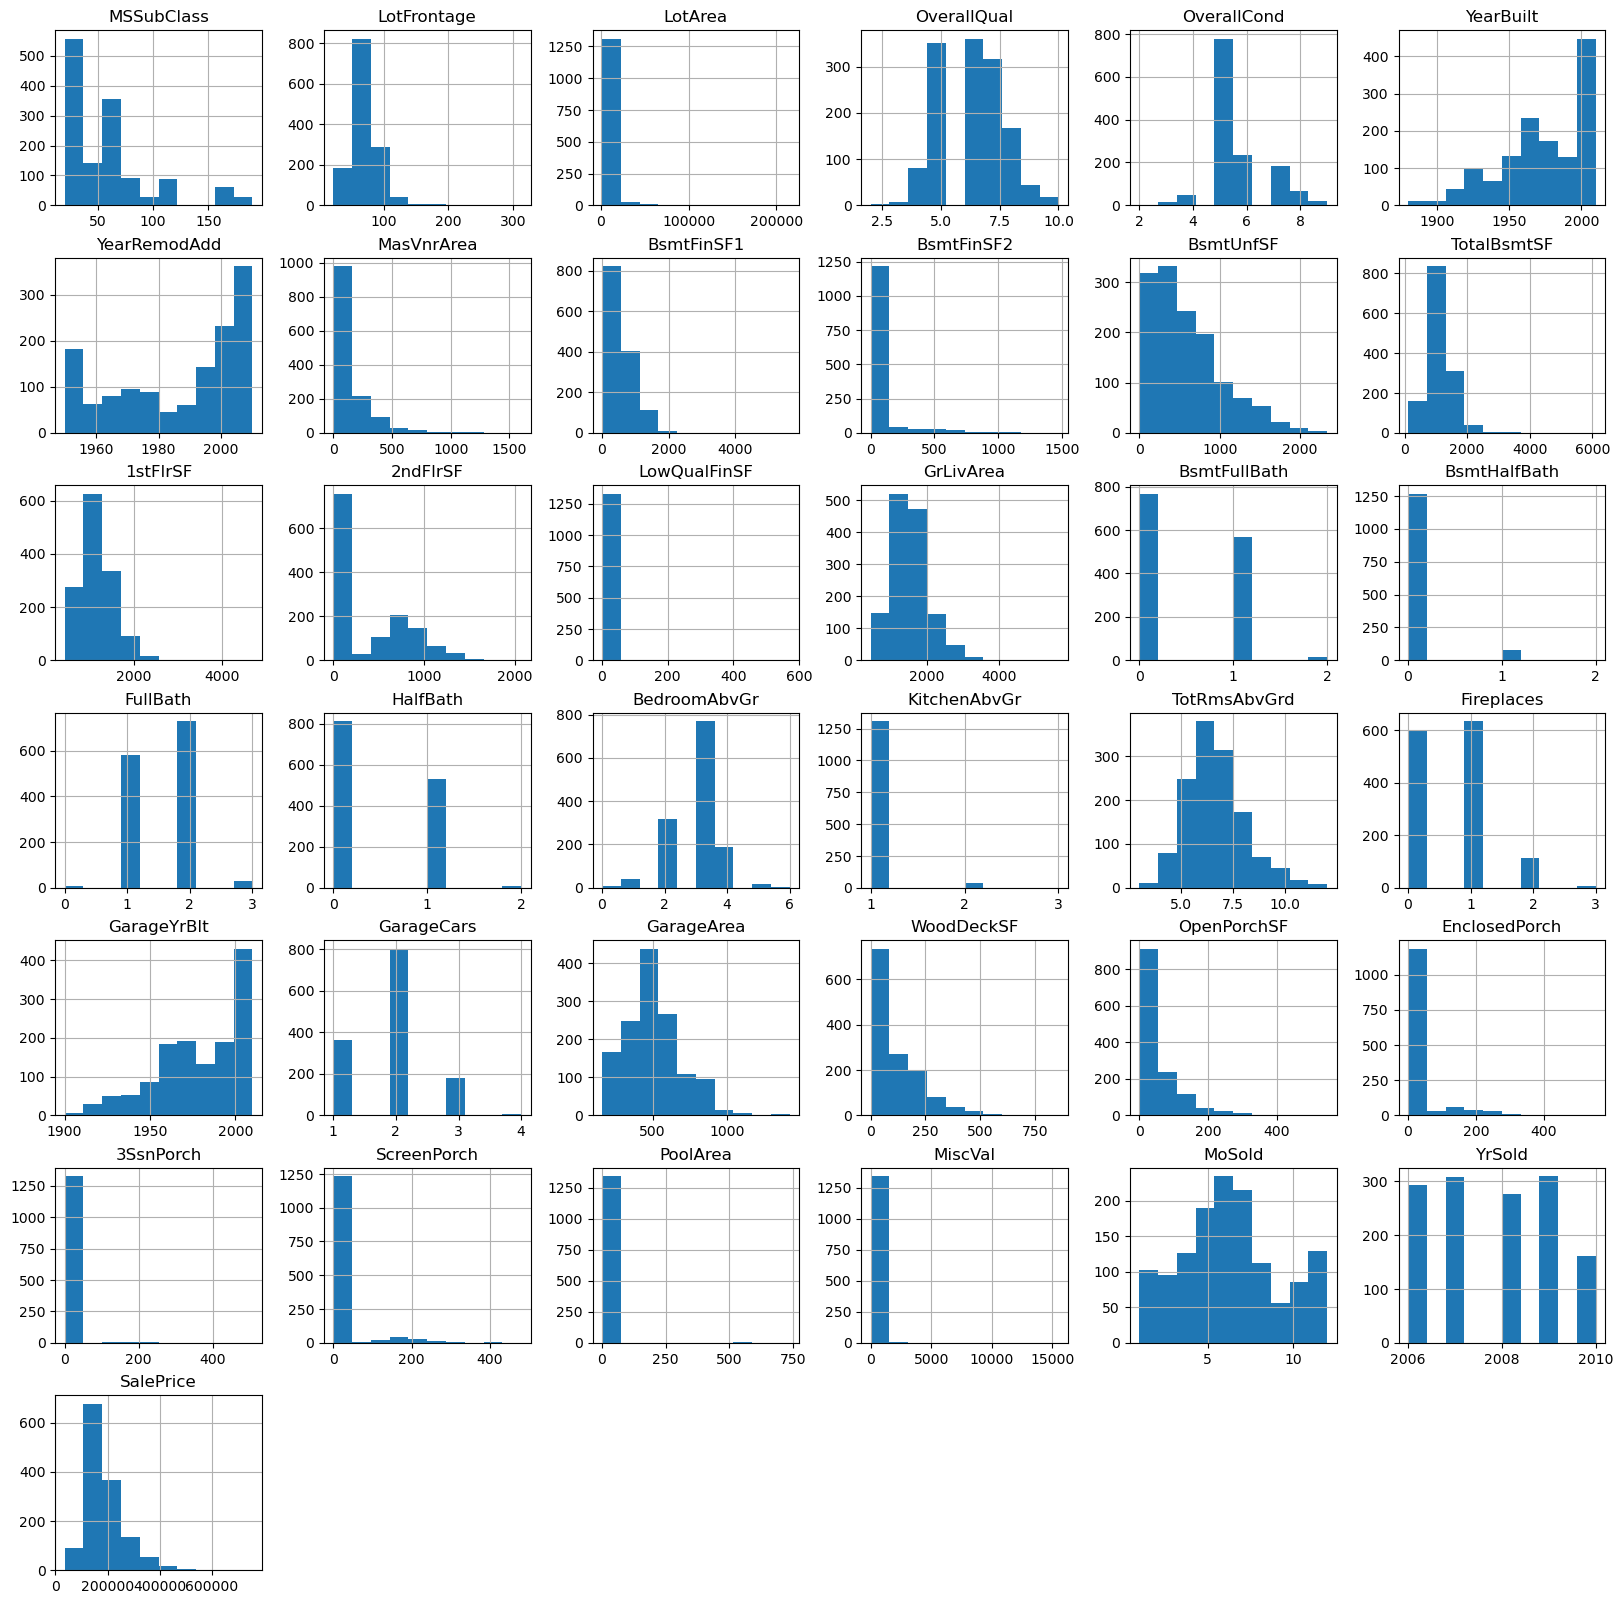

In [21]:
# check the histogram of dataset
housing_df.hist(figsize=(20,20))
plt.show()

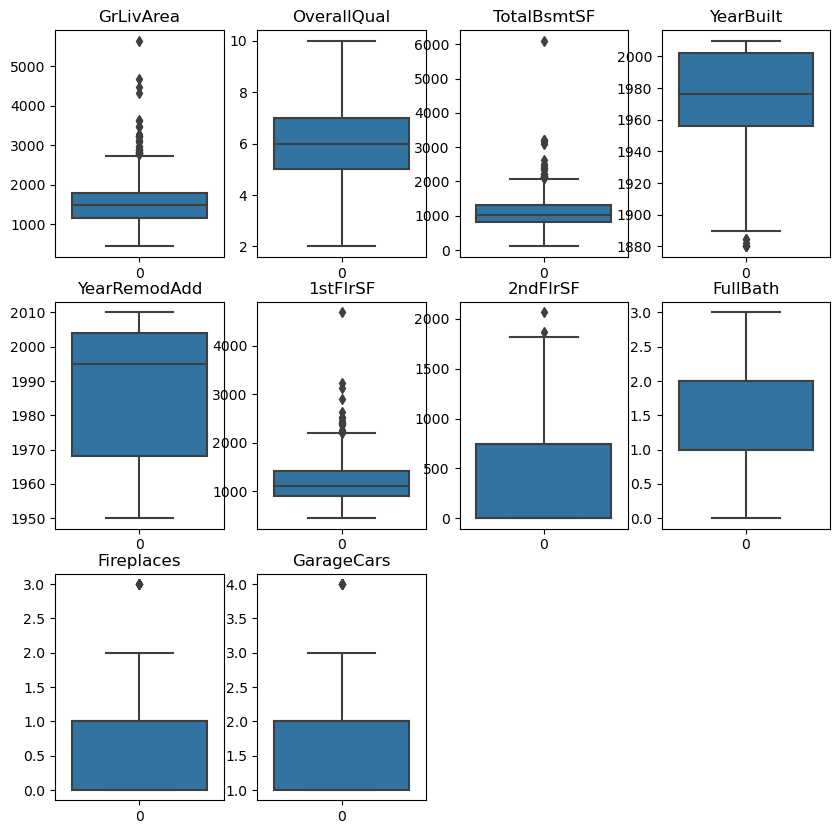

In [22]:
list = ['GrLivArea','OverallQual', 'TotalBsmtSF','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','FullBath','Fireplaces','GarageCars' ]
plt.figure(figsize=(10,10))
i=1
for column in list:
    plt.subplot(3,4,i)
    i=i+1
    sns.boxplot(housing_df[column]).set_title(column)
plt.show()

In [23]:
# The 50 percentile of GrLivArea around 1500,
# Overall quality 50 percentile is 6
# the total Basement have some outliers. 
# Most of the building build after 1960
# from 1970 to 2005, there are remodeling of home
# 75 percentile for second floor is around 750

#### As there are many categorical features, applying label encoding to our housing data frame

In [24]:
label_encoder = preprocessing.LabelEncoder()
housing_df= housing_df.apply(label_encoder.fit_transform)

#### standardize our data frame to compare among the features 

In [25]:
#standardizing the hoursing data frame
housing_df = (housing_df-housing_df.mean())/housing_df.std()

#### Creating the regplot of all the feature against the Sale Price

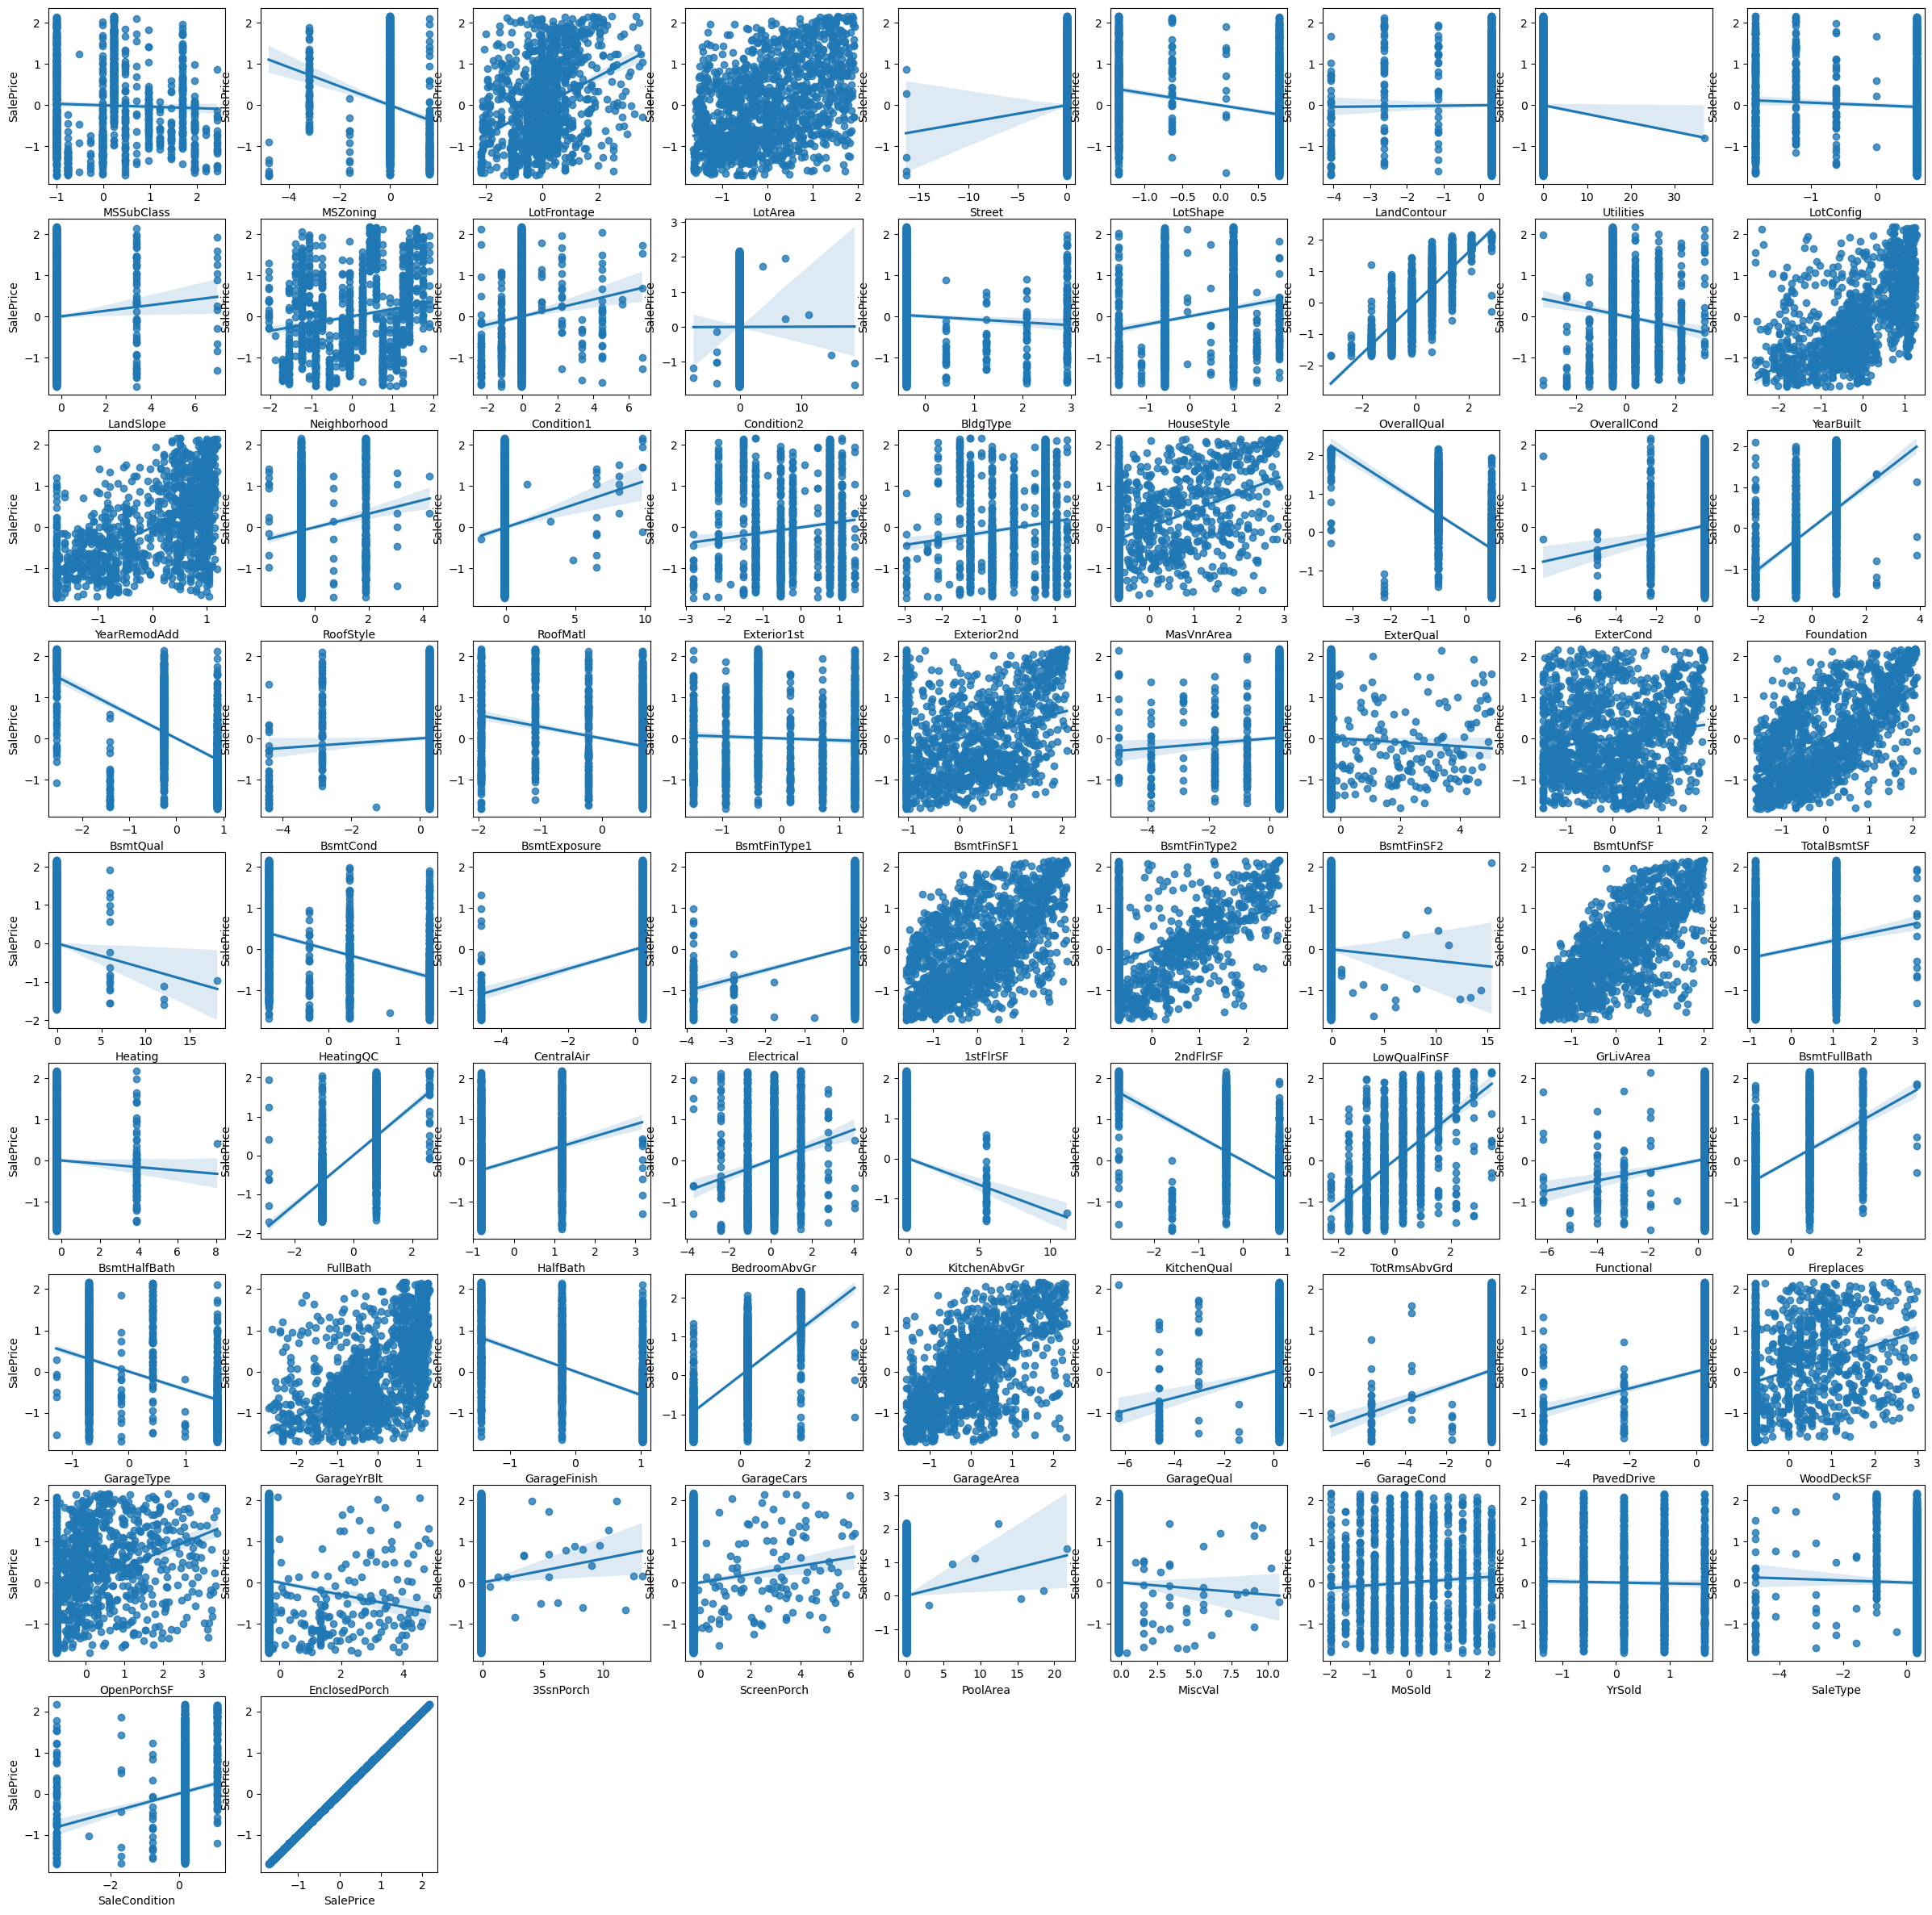

In [26]:
plt.figure(figsize=(30,30))
i=1
for column in housing_df.columns:
    plt.subplot(9,9,i)
    i=i+1
    sns.regplot(data=housing_df, x=column, y='SalePrice')
plt.show()

In [27]:
#here we can see for most of the features,  rig line is going in upwards, downwords and constant. 
# it is showing the trand what type of relation sale price is with feature, it is positive, 
#negative or constant
 

#### Now applying Regularization considering when alpha = 0, our current model is overfit

#### Staring with Lasso regression 

In [28]:
# In this section of lasso regression, I will try to find out the possible alpha values
df_train, df_test = train_test_split(housing_df, test_size=0.3, random_state=100)
df_train=pd.DataFrame(df_train)
df_test=pd.DataFrame(df_test)
y_train = pd.DataFrame(df_train.pop('SalePrice'))
X_train = df_train
y_test = pd.DataFrame(df_test.pop('SalePrice'))
X_test = df_test
print('<===========Lasso Start==========================>')
alphas= [0,0.001, 0.01, 0.1, 1, 10, 100, 1000] ## possible alpha values
min_r2=100
opt_alpha=0
opt_r2_score_train=0
opt_r2_score_test=0
for i in alphas:
    lasso = Lasso(alpha=i)
    lasso.fit(X_train, y_train)
    y_lasso_train= lasso.predict(X_train)
    y_lasso_test = lasso.predict(X_test)
    r2_score_train = r2_score(y_lasso_train,y_train)
    r2_score_test = r2_score(y_lasso_test, y_test)
    r2_relative = abs(r2_score_train-r2_score_test)
    if min_r2>r2_relative:
        min_r2=r2_relative
        opt_alpha=i
        opt_r2_score_train=r2_score_train
        opt_r2_score_test=r2_score_test
print('opt lampda====>',opt_alpha )
print('opt_r2_score_train ', opt_r2_score_train)
print('opt_r2_score_test ', opt_r2_score_test)
print('<==========Lasso End===========================>')


<===========Lasso Start==========================>
opt lampda====> 0.01
opt_r2_score_train  0.8935588203868956
opt_r2_score_test  0.8880161762155593
<==========Lasso End===========================>


###### here I can see, for lasso model optimal alpha value is 0.01, so next section , alpha limits 0.001, 0.1

#### Ridge Regression

In [29]:
# In this section of Ridge regression, I will try to find out the possible alpha values
df_train, df_test = train_test_split(housing_df, test_size=0.3, random_state=100)
df_train=pd.DataFrame(df_train)
df_test=pd.DataFrame(df_test)
y_train = pd.DataFrame(df_train.pop('SalePrice'))
X_train = df_train
y_test = pd.DataFrame(df_test.pop('SalePrice'))
X_test = df_test
print('<===========Ridge Start==========================>')
alphas= [0,0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000] ## possible alpha values
min_r2=100
opt_alpha=0
opt_r2_score_train=0
opt_r2_score_test=0
for i in alphas:
    ridge = Ridge(alpha=i)
    ridge.fit(X_train, y_train)
    y_ridge_train= ridge.predict(X_train)
    y_ridge_test = ridge.predict(X_test)
    r2_score_train = r2_score(y_ridge_train,y_train)
    r2_score_test = r2_score(y_ridge_test, y_test)
    r2_relative = abs(r2_score_train-r2_score_test)
    if min_r2>r2_relative:
        min_r2=r2_relative
        opt_alpha=i
        opt_r2_score_train=r2_score_train
        opt_r2_score_test=r2_score_test
print('opt lampda====>',opt_alpha )
print('opt_r2_score_train ', opt_r2_score_train)
print('opt_r2_score_test ', opt_r2_score_test)
print('<==========Ridge End===========================>')


<===========Ridge Start==========================>
opt lampda====> 1000
opt_r2_score_train  0.8253634550149265
opt_r2_score_test  0.8237550341161323
<==========Ridge End===========================>


In [30]:
###### here I can see, for ridge model optimal alpha value is 1000, so next section , alpha limits 100, 10000

In [31]:
## Define a funtion which will divide the given interval into equal part
def alpha_range( start_alpha, end_alpha):
    alpha_interval = (end_alpha-start_alpha)/parts
    alpha_range=[0]*parts
    for i in range(0, parts):
        alpha_range[i]= start_alpha+i*alpha_interval
    return alpha_range

#### Now as I able to find the limits for alphas for lasso & ridge regression model 

In [32]:
df_train, df_test = train_test_split(housing_df, test_size=0.3, random_state=100)
df_train=pd.DataFrame(df_train)
df_test=pd.DataFrame(df_test)
y_train = pd.DataFrame(df_train.pop('SalePrice'))
X_train = df_train
y_test = pd.DataFrame(df_test.pop('SalePrice'))
X_test = df_test
# Staring with the ridge model for alpha
print('<===========Ridge Start==========================>')
min_r2=100
opt_alpha=0
opt_r2_score_train=0
opt_r2_score_test=0
start_alpha=100
end_alpha=10000
parts=20

ridge_regression = Ridge(alpha=0)
lasso_regression = Lasso(alpha=0)
ridge_regression_2 = Ridge(alpha=0)
lasso_regression_2 = Lasso(alpha=0)
linear_regression = Ridge(alpha=0)
lasso_alpha= []
ridge_alpha=[]
for i in range(parts):
    alphas = alpha_range(start_alpha, end_alpha)
    for j in range(parts):
        ridge = Ridge(alpha=alphas[j])
        ridge.fit(X_train, y_train)
        y_ridge_train= ridge.predict(X_train)
        y_ridge_test = ridge.predict(X_test)
        r2_score_train = r2_score(y_ridge_train,y_train)
        r2_score_test = r2_score(y_ridge_test, y_test)
        r2_relative = abs(r2_score_train-r2_score_test)
        ridge_alpha.append([alphas[j],r2_score_train,r2_score_test,r2_relative])
        if min_r2>r2_relative:
            min_r2=r2_relative
            opt_alpha=j
            opt_r2_score_train=r2_score_train
            opt_r2_score_test=r2_score_test
            ridge_regression=ridge
        start_alpha=alphas[opt_alpha-1]
        end_alpha=alphas[opt_alpha+1]
ridge_alpha=pd.DataFrame(ridge_alpha)
print('opt lampda====>',alphas[opt_alpha] )
print('opt_r2_score_train ', opt_r2_score_train)
print('opt_r2_score_test ', opt_r2_score_test)

#doubling the optimal alpha value for ridge
ridge_regression_2 = Ridge(alpha=2*alphas[opt_alpha])
ridge_regression_2.fit(X_train, y_train)
# this is when alpha =0 
linear_regression.fit(X_train, y_train)
print('<==========Ridge End===========================>')

print('<==========Lasso Start===========================>')
# Staring with the lasso model for alpha
min_r2=100
opt_alpha=0
opt_r2_score_train=0
opt_r2_score_test=0
start_alpha=0.001
end_alpha=0.1

for i in range(parts):
    alphas = alpha_range(start_alpha, end_alpha)
    for j in range(parts):
        lasso = Lasso(alpha=alphas[j])
        lasso.fit(X_train, y_train)
        y_lasso_train= lasso.predict(X_train)
        y_lasso_test = lasso.predict(X_test)
        r2_score_train = r2_score(y_lasso_train,y_train)
        r2_score_test = r2_score(y_lasso_test, y_test)
        r2_relative = abs(r2_score_train-r2_score_test)
        lasso_alpha.append([alphas[j],r2_score_train,r2_score_test,r2_relative])
        if min_r2>r2_relative:
            min_r2=r2_relative
            opt_alpha=j
            opt_r2_score_train=r2_score_train
            opt_r2_score_test=r2_score_test
            lasso_regression=lasso
        start_alpha=alphas[opt_alpha-1]
        end_alpha=alphas[opt_alpha+1]
lasso_alpha=pd.DataFrame(lasso_alpha)
print('opt lampda====>',alphas[opt_alpha] )
print('opt_r2_score_train ', opt_r2_score_train)
print('opt_r2_score_test ', opt_r2_score_test)
#doubling the optimal alpha value for ridge
lasso_regression_2 = Lasso(alpha=2*alphas[opt_alpha])
lasso_regression_2.fit(X_train, y_train)
print('<==========Lasso End===========================>')


<===========Ridge Start==========================>
opt lampda====> 1235.2708512209517
opt_r2_score_train  0.8053248568894361
opt_r2_score_test  0.8053248568894361
<==========Ridge End===========================>
<==========Lasso Start===========================>
opt lampda====> 0.023000000000000007
opt_r2_score_train  0.8772105414811167
opt_r2_score_test  0.8772145660073668
<==========Lasso End===========================>


#### Comparing the cofficient of simple linear regression, optimal alpha and 2* optimal alpha  lasso regression & ridge regression 

In [33]:
coef_list=['columns','linear_coef_0','lasso_coef','lasso_coef_2','ridge_coef','ridge_coef_2']
linear_regression = Ridge(alpha=0)
linear_regression.fit(X_train, y_train)
linear_coef=pd.DataFrame(0,index=np.arange(73), columns=coef_list)
linear_coef['columns']=df_train.columns
linear_coef['linear_coef_0']=pd.Series(linear_regression.coef_[0])
linear_coef['ridge_coef']=pd.Series(ridge_regression.coef_[0])
linear_coef['ridge_coef_2']=pd.Series(ridge_regression_2.coef_[0])
linear_coef['lasso_coef']=pd.Series(lasso_regression.coef_)
linear_coef['lasso_coef_2']=pd.Series(lasso_regression_2.coef_)
linear_coef.sort_values(by=['lasso_coef'], ascending=False).head(5) # find the top 5 feature 


,columns,linear_coef_0,lasso_coef,lasso_coef_2,ridge_coef,ridge_coef_2
43,GrLivArea,0.287686,0.337758,0.318849,0.091313,0.072324
15,OverallQual,0.200652,0.236845,0.258547,0.098294,0.077725
35,TotalBsmtSF,0.176469,0.122981,0.114429,0.062389,0.051634
17,YearBuilt,0.177742,0.120979,0.103303,0.041992,0.038071
18,YearRemodAdd,0.044908,0.069731,0.090333,0.052400,0.045806


In [34]:
#### Dropping the top 5 feature of the otpimal lasso model and then again training the model 

In [35]:
drop_list=['GrLivArea','OverallQual','TotalBsmtSF','YearBuilt','YearRemodAdd']
housing_df=housing_df.drop(drop_list, axis=1)

df_train, df_test = train_test_split(housing_df, test_size=0.3, random_state=100)
df_train=pd.DataFrame(df_train)
df_test=pd.DataFrame(df_test)

y_train = pd.DataFrame(df_train.pop('SalePrice'))
X_train = df_train
y_test = pd.DataFrame(df_test.pop('SalePrice'))
X_test = df_test
parts=20
min_r2=100
opt_alpha=0
opt_r2_score_train=0
opt_r2_score_test=0
start_alpha=0.001
end_alpha=0.1
lasso_regression = Lasso(alpha=0)
lasso_regression_2 = Lasso(alpha=0)
linear_regression = Ridge(alpha=0)
lasso_alpha= []
ridge_alpha=[]
print('<==========Lasso Start===========================>')

for i in range(parts):
    alphas = alpha_range(start_alpha, end_alpha)
    for j in range(parts):
        lasso = Lasso(alpha=alphas[j])
        lasso.fit(X_train, y_train)
        y_lasso_train= lasso.predict(X_train)
        y_lasso_test = lasso.predict(X_test)
        r2_score_train = r2_score(y_lasso_train,y_train)
        r2_score_test = r2_score(y_lasso_test, y_test)
        r2_relative = abs(r2_score_train-r2_score_test)
        lasso_alpha.append([alphas[j],r2_score_train,r2_score_test,r2_relative])
        if min_r2>r2_relative:
            min_r2=r2_relative
            opt_alpha=j
            opt_r2_score_train=r2_score_train
            opt_r2_score_test=r2_score_test
            lasso_regression=lasso
        start_alpha=alphas[opt_alpha-1]
        end_alpha=alphas[opt_alpha+1]
lasso_alpha=pd.DataFrame(lasso_alpha)
print('opt lampda====>',alphas[opt_alpha] )
print('opt_r2_score_train ', opt_r2_score_train)
print('opt_r2_score_test ', opt_r2_score_test)
print('<==========Lasso End===========================>')


<==========Lasso Start===========================>
opt lampda====> 0.006500000000000001
opt_r2_score_train  0.8519570523653636
opt_r2_score_test  0.8521053078154266
<==========Lasso End===========================>


#### Comparing the cofficient of simple linear regression, optimal alpha and 2* optimal alpha lasso regression & ridge regression after dropping 5 top features

In [36]:
coef_list=['columns','linear_coef_0','lasso_coef','ridge_coef']
linear_regression = Ridge(alpha=0)
linear_regression.fit(X_train, y_train)
linear_coef=pd.DataFrame(0,index=np.arange(68), columns=coef_list)
linear_coef['columns']=df_train.columns
linear_coef['linear_coef_0']=pd.Series(linear_regression.coef_[0])
linear_coef['ridge_coef']=pd.Series(ridge_regression.coef_[0])
linear_coef['lasso_coef']=pd.Series(lasso_regression.coef_)
linear_coef.sort_values(by=['lasso_coef'], ascending=False).head(5)# find the top 5 feature

,columns,linear_coef_0,lasso_coef,ridge_coef
36,1stFlrSF,0.242264,0.289625,0.003230
37,2ndFlrSF,0.222860,0.204360,-0.041867
41,FullBath,0.128034,0.121982,0.050736
52,GarageCars,0.087588,0.087271,0.025930
48,Fireplaces,0.079792,0.087106,0.011752
